Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


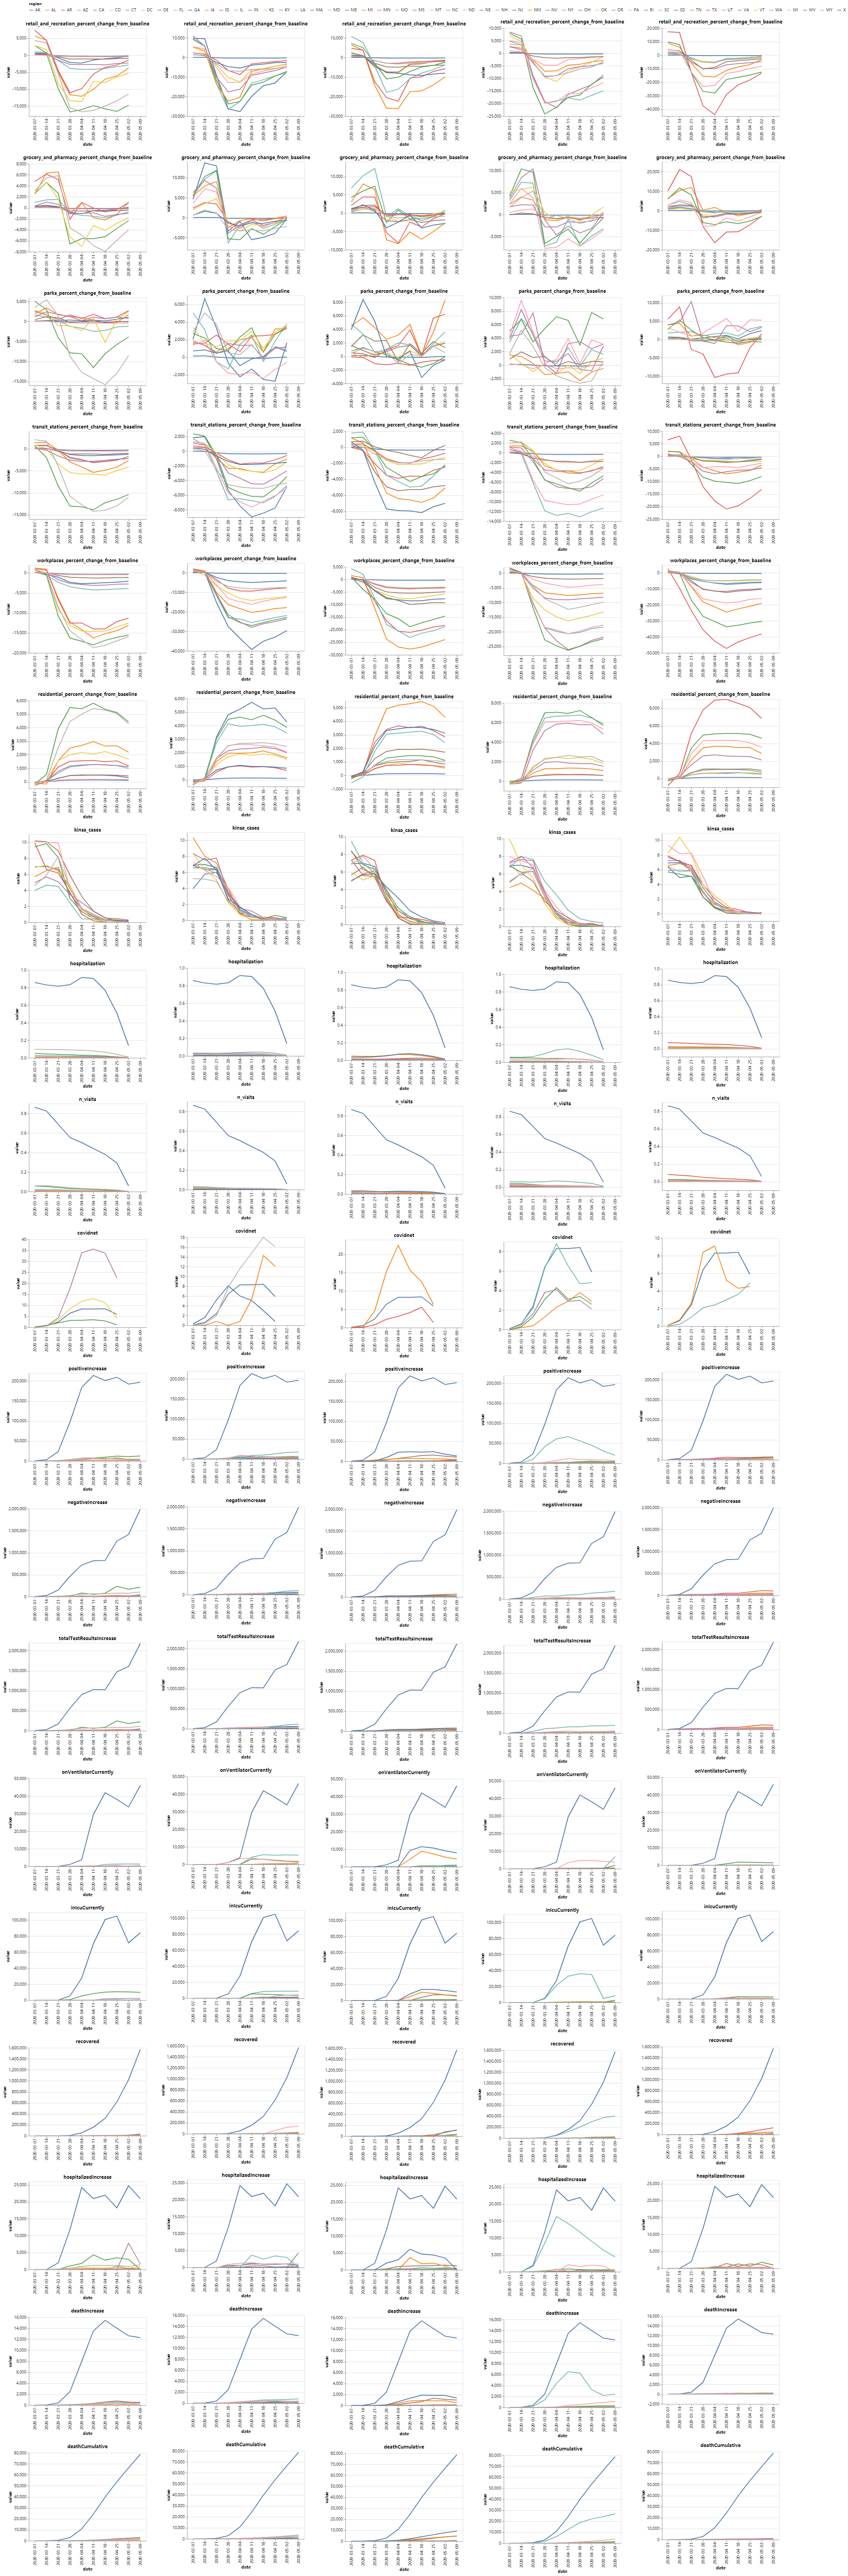

In [8]:
!pip install altair
import altair as alt
import pandas as pd
import numpy as np

# Global Parameters:
Weeks = 10 # How many weeks in the dataset
Signals = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'kinsa_cases', 'hospitalization', 'n_visits', 'covidnet', 'positiveIncrease', 'negativeIncrease', 'totalTestResultsIncrease', 'onVentilatorCurrently', 'inIcuCurrently', 'recovered', 'hospitalizedIncrease', 'deathIncrease', 'deathCumulative']

MyData = pd.read_csv("covid-hospitalization-all-state-merged.csv")

ChartList = []

for signal in MyData.columns:
    if (signal in Signals):
        for subgraph in range(5):
            DataDictionary = {}
            StateList = [0]
            for state in range(10*subgraph+1,10*subgraph+11):
                StateList.append(state)
            for state in StateList: # 50 States and one total
                DataList = []
                DateList = []
                for week in range(Weeks):
                    DataList.append(MyData.loc[Weeks*state+week][signal])
                    DateList.append(MyData.loc[Weeks*state+week]["date"])
                DataDictionary[str(MyData.loc[Weeks*state+week]["region"])] = DataList

            Data = pd.DataFrame(DataDictionary,index = DateList)
            Data.columns.name = "region"
            Data.index.name = "date"
            Data = Data.reset_index().melt('date')

            chart = alt.Chart(Data).mark_line().encode(
                x='date',
                y='value',
                color='region',        
            ).properties(
                width=300,
                height=225,
                title = signal,
            )
            
            ChartList.append(chart)

#ChartList = (ChartList[0] | ChartList[1] | ChartList[2] | ChartList[3] | ChartList[4]) & (ChartList[5] | ChartList[6] | ChartList[7] | ChartList[8] | ChartList[9]) & (ChartList[10] | ChartList[11] | ChartList[12] | ChartList[13] | ChartList[14]) & (ChartList[15] | ChartList[16] | ChartList[17] | ChartList[18] | ChartList[19]) & (ChartList[20] | ChartList[21] | ChartList[22] | ChartList[23] | ChartList[24]) & (ChartList[25] | ChartList[26] | ChartList[27] | ChartList[28] | ChartList[29]) & (ChartList[30] | ChartList[31] | ChartList[32] | ChartList[33] | ChartList[34]) & (ChartList[35] | ChartList[36] | ChartList[37] | ChartList[38] | ChartList[39]) & (ChartList[40] | ChartList[41] | ChartList[42] | ChartList[43] | ChartList[44]) & (ChartList[45] | ChartList[46] | ChartList[47] | ChartList[48] | ChartList[49]) & (ChartList[50] | ChartList[51] | ChartList[52] | ChartList[53] | ChartList[54]) & (ChartList[55] | ChartList[56] | ChartList[57] | ChartList[58] | ChartList[59]) & (ChartList[60] | ChartList[61] | ChartList[62] | ChartList[63] | ChartList[64]) & (ChartList[65] | ChartList[66] | ChartList[67] | ChartList[68] | ChartList[69]) & (ChartList[70] | ChartList[71] | ChartList[72] | ChartList[73] | ChartList[74]) & (ChartList[75] | ChartList[76] | ChartList[77] | ChartList[78] | ChartList[79]) & (ChartList[80] | ChartList[81] | ChartList[82] | ChartList[83] | ChartList[84]) & (ChartList[85] | ChartList[86] | ChartList[87] | ChartList[88] | ChartList[89]) & (ChartList[90] | ChartList[91] | ChartList[92] | ChartList[93] | ChartList[94])
ChartList = (ChartList[0] & ChartList[5] & ChartList[10] & ChartList[15] & ChartList[20] & ChartList[25] & ChartList[30] & ChartList[35] & ChartList[40] & ChartList[45] & ChartList[50] & ChartList[55] & ChartList[60] & ChartList[65] & ChartList[70] & ChartList[75] & ChartList[80] & ChartList[85] & ChartList[90]) | (ChartList[1] & ChartList[6] & ChartList[11] & ChartList[16] & ChartList[21] & ChartList[26] & ChartList[31] & ChartList[36] & ChartList[41] & ChartList[46] & ChartList[51] & ChartList[56] & ChartList[61] & ChartList[66] & ChartList[71] & ChartList[76] & ChartList[81] & ChartList[86] & ChartList[91]) | (ChartList[2] & ChartList[7] & ChartList[12] & ChartList[17] & ChartList[22] & ChartList[27] & ChartList[32] & ChartList[37] & ChartList[42] & ChartList[47] & ChartList[52] & ChartList[57] & ChartList[62] & ChartList[67] & ChartList[72] & ChartList[77] & ChartList[82] & ChartList[87] & ChartList[92]) | (ChartList[3] & ChartList[8] & ChartList[13] & ChartList[18] & ChartList[23] & ChartList[28] & ChartList[33] & ChartList[38] & ChartList[43] & ChartList[48] & ChartList[53] & ChartList[58] & ChartList[63] & ChartList[68] & ChartList[73] & ChartList[78] & ChartList[83] & ChartList[88] & ChartList[93]) | (ChartList[4] & ChartList[9] & ChartList[14] & ChartList[19] & ChartList[24] & ChartList[29] & ChartList[34] & ChartList[39] & ChartList[44] & ChartList[49] & ChartList[54] & ChartList[59] & ChartList[64] & ChartList[69] & ChartList[74] & ChartList[79] & ChartList[84] & ChartList[89] & ChartList[94])

ChartList = ChartList.configure_legend(
    orient='top',
    titleFontSize=10,
    labelFontSize=10,
).configure_title(fontSize=12)
ChartList